In [35]:
import os
import numpy as np
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
# Changing Directory
os.chdir('/Users/annettedblackburn/Desktop/Data_Analytics_Bootcamp/Module 20 - Final (Group) Project')

In [37]:
os.listdir(os.curdir)

['.DS_Store',
 'crude-oil-price.csv',
 'twitter_NLP_json.ipynb',
 'PET_PRI_GND_DCUS_NUS_W.csv',
 'archive(2).zip',
 'archive(1).zip',
 'twitter_NLP.ipynb',
 'gas_oil_ML.ipynb',
 'tweets_clean.csv',
 'tweets_clean.json',
 'gas_oil_LR_twitter_NLP.py',
 '.ipynb_checkpoints',
 'gas-diesel-prices.csv']

## Description of Preliminary Data Preprocessing
Starting with crude oil data (1983 to present) and gas and diesel price data (1995 to 2021), the data are cleaned to fit into a linear regression machine learning model.
Below the data are loaded into two dataframes (gas_df and crude_df). The cleaned gas price dataframe includes all formulations of retail gasoline and diesel prices in a MM/DD/YYYY format with samples from each month starting in January 1995 to January 2021. The cleaned crude oil dataframe is in the same format as the cleaned gas price dataframe: MM/DD/YYYY format with monthly samples from January 1995 to January 2021.

## Data Examining & Cleaning 

In [38]:
hist_gas_df = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv")
hist_gas_df.head()

#A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
#A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
#A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
#R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
#R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
#R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
#M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
#M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
#M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
#P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)
#P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
#P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
#D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)



,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [39]:
# Dropping conventional and reformulated retail gas prices as well as all, mid-grade, and premium
hist_gas_df['date'] = hist_gas_df['Date']
hist_gas_df = hist_gas_df[['date', 'R1', 'D1']]
hist_gas_df.head(10)

,date,R1,D1
0,01/02/1995,1.079,1.104
1,01/09/1995,1.086,1.102
2,01/16/1995,1.078,1.100
3,01/23/1995,1.083,1.095
4,01/30/1995,1.083,1.090
5,02/06/1995,1.076,1.086
6,02/13/1995,1.074,1.088
7,02/20/1995,1.067,1.088
8,02/27/1995,1.073,1.089
9,03/06/1995,1.076,1.089


In [40]:
crude_df = pd.read_csv("crude-oil-price.csv")
crude_df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


In [41]:
# Dropping percent change and change of crude oil prices
crude_df = crude_df[['date', 'price']]
crude_df.head()

,date,price
0,1983-03-30T00:00:00,29.27
1,1983-04-04T00:00:00,30.63
2,1983-05-02T00:00:00,30.25
3,1983-06-01T00:00:00,31.38
4,1983-07-01T00:00:00,32.00


In [42]:
# Formatting crude_df to match hist_gas_df date format
from datetime import date
def fix_date(bad_date):
    bad_date = str(bad_date)
    year, month, day = bad_date.split('-')
    day = day[0:2]
    return date(int(year), int(month), int(day))

crude_df['date'] = crude_df['date'].apply(fix_date) 
crude_df.head()

,date,price
0,1983-03-30,29.27
1,1983-04-04,30.63
2,1983-05-02,30.25
3,1983-06-01,31.38
4,1983-07-01,32.00


In [43]:
# Dropping 1983-1994 from crude_df
cuttoff_date = date(1994, 12, 31)
crude_df = crude_df.loc[crude_df['date'] > cuttoff_date]
crude_df.head(10)

,date,price
142,1995-01-03,18.39
143,1995-02-01,18.49
144,1995-03-01,19.17
145,1995-04-03,20.38
146,1995-05-01,18.89
147,1995-06-01,17.40
148,1995-07-05,17.56
149,1995-08-01,17.84
150,1995-09-01,17.54
151,1995-10-02,17.64


In [44]:
# Lining up months and years in crude_df and gas_df
def date2str(dt):
    return dt.strftime('%m/%Y')

def drop_month(dt):
    month, day, year = dt.split('/')
    return f"{month}/{year}"

crude_df['date'] = crude_df['date'].apply(date2str)
hist_gas_df['date'] = hist_gas_df['date'].apply(drop_month)

In [45]:
# Price per barrel 
crude_df.head()

,date,price
142,01/1995,18.39
143,02/1995,18.49
144,03/1995,19.17
145,04/1995,20.38
146,05/1995,18.89


In [46]:
crude_df.tail(25)

,date,price
450,09/2020,40.2200
451,10/2020,35.7900
452,11/2020,45.3400
453,12/2020,48.5200
454,01/2021,52.2000
455,02/2021,61.5000
456,03/2021,59.1600
457,04/2021,63.5800
458,05/2021,66.9300
459,06/2021,73.4700


In [47]:
# Omit 2022 data 
crude_df = crude_df.loc[0:454]
crude_df.tail(10)

,date,price
445,04/2020,18.84
446,05/2020,35.49
447,06/2020,39.27
448,07/2020,40.27
449,08/2020,42.61
450,09/2020,40.22
451,10/2020,35.79
452,11/2020,45.34
453,12/2020,48.52
454,01/2021,52.20


In [48]:
# Price per gallon 
hist_gas_df.head()

,date,R1,D1
0,01/1995,1.079,1.104
1,01/1995,1.086,1.102
2,01/1995,1.078,1.100
3,01/1995,1.083,1.095
4,01/1995,1.083,1.090


In [49]:
hist_gas_df.tail(15)

,date,R1,D1
1346,10/2020,2.150,2.388
1347,10/2020,2.143,2.385
1348,11/2020,2.112,2.372
1349,11/2020,2.096,2.383
1350,11/2020,2.111,2.441
1351,11/2020,2.102,2.462
1352,11/2020,2.120,2.502
1353,12/2020,2.156,2.526
1354,12/2020,2.158,2.559
1355,12/2020,2.224,2.619


In [74]:
# Keep only first Month/Year instance for gas_df
seen_dates = set()
indices_to_remove = []
for idx, row in hist_gas_df.iterrows():
    _date = row['date']
    if _date in seen_dates:
        indices_to_remove.append(idx)
    else:
        seen_dates.add(_date)
hist_gas_df.drop(indices_to_remove, inplace=True)

# Renaming R1 and D1 to Regular and Diesel to match current_gas_df
hist_gas_df = hist_gas_df.rename(columns={'R1': 'Regular', 'D1': 'Diesel'})

hist_gas_df.head()

,date,Regular,Diesel
0,01/1995,1.079,1.104
5,02/1995,1.076,1.086
9,03/1995,1.076,1.089
13,04/1995,1.087,1.094
17,05/1995,1.148,1.119


In [75]:
# Current Gas Prices DF Data Cleaning
current_gas_df = pd.read_csv("gas-diesel-prices.csv")


# Lining up months and years in current_gas_df to match crude_df and hist_gas_df
def date2str(dt):
    return dt.strftime('%m/%Y')

def drop_month(dt):
    year, month, day = dt.split('-')
    return f"{month}/{year}"
current_gas_df['date'] = current_gas_df['Date'].apply(drop_month)

# Keep only first Month/Year instance for current_gas_df
seen_dates = set()
indices_to_remove = []
for idx, row in current_gas_df.iterrows():
    _date = row['date']
    if _date in seen_dates:
        indices_to_remove.append(idx)
    else:
        seen_dates.add(_date)
current_gas_df.drop(indices_to_remove, inplace=True)

current_gas_df = current_gas_df[['date', 'Regular', 'Diesel']]

#current_gas_df = current_gas_df.rename(columns={'Regular': 'R1', 'Diesel': 'D1'})

current_gas_df.head()

,date,Regular,Diesel
0,02/2022,3.54,3.96
6,03/2022,3.62,4.02
37,04/2022,4.22,5.11
67,05/2022,4.19,5.30
98,06/2022,4.67,5.54


In [76]:
# Appending hist_gas_df and current_gas_df
# Creating gas_df
gas_df = pd.DataFrame
# Appending historical gas DF
gas_df.append(hist_gas_df)
# Appending current gas DF
gas_df.append(current_gas_df)
# Checking that appending worked 
gas_df


[         date  Regular  Diesel
 0     01/1995    1.079   1.104
 5     02/1995    1.076   1.086
 9     03/1995    1.076   1.089
 13    04/1995    1.087   1.094
 17    05/1995    1.148   1.119
 ...       ...      ...     ...
 1340  09/2020    2.211   2.435
 1344  10/2020    2.172   2.387
 1348  11/2020    2.112   2.372
 1353  12/2020    2.156   2.526
 1357  01/2021    2.249   2.640
 
 [313 rows x 3 columns],
         date  Regular  Diesel
 0    02/2022     3.54    3.96
 6    03/2022     3.62    4.02
 37   04/2022     4.22    5.11
 67   05/2022     4.19    5.30
 98   06/2022     4.67    5.54
 128  07/2022     4.84    5.76
 159  08/2022     4.21    5.28
 187  09/2022     3.83    5.08
 217  10/2022     3.80    4.87
 248  11/2022     3.76    5.31
 278  12/2022     3.47    5.15]

# Linear Regression Machine Learning Model

## Description of Preliminary Feature Engineering and Preliminary Feature Selection
To fit a linear regression model with crude oil and gas price data to establish and explore relationships between the data.

# Explanation of Model Choice, including Limitations and Benefits 
This linear regression model is the best model because historically, crude oil prices and gas prices have a linear relationship, so there is no need to complicate the relationship with other, more complex models.

In [91]:
# X = crude oil price [=] 1/barrel
# Y = gas price [=] 1/gallon
import numpy as np

X = np.array(crude_df['price'])
Y = gas_df['Regular'].to_numpy()


## Train, Test, Split Description 
The data are split into 80% training and 20% testing.

In [92]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

X_train = X_train.reshape((-1,1))
X_test = X_test.reshape((-1,1))

In [93]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

# R-squared (how much of the outcome is predicted correctly by the model) with training data
r_2_train = lin_reg_model.score(X_train, Y_train)
r_2_train

0.9030569650034823

/var/folders/_j/yd9ttlns727476l3p83m83nr0000gn/T/ipykernel_1082/185166622.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


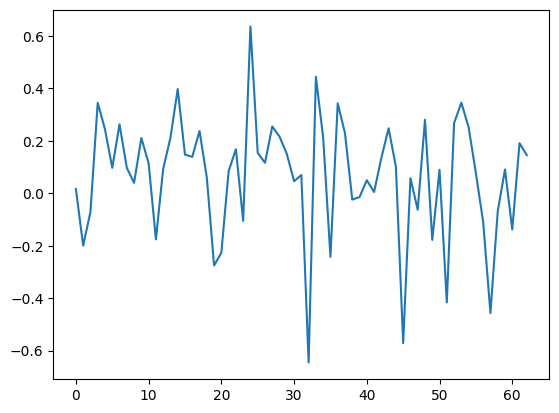

In [94]:
from matplotlib import pyplot as plt

predictions = lin_reg_model.predict(X_test)
r_2_test = lin_reg_model.score(X_test, Y_test)
diffs = [0]*len(Y_test)
for (pred, real, idx) in zip(predictions, Y_test, range(len(Y_test))):
    diffs[idx] = pred - real

# Plot of difference of real data from best fit line 
fig, ax = plt.subplots()
ax.plot(diffs)
fig.show()

In [88]:
# R-squared (how much of the outcome is predicted correctly by the model) with test data
r_2_test

0.9051280427121133

### Visualizations

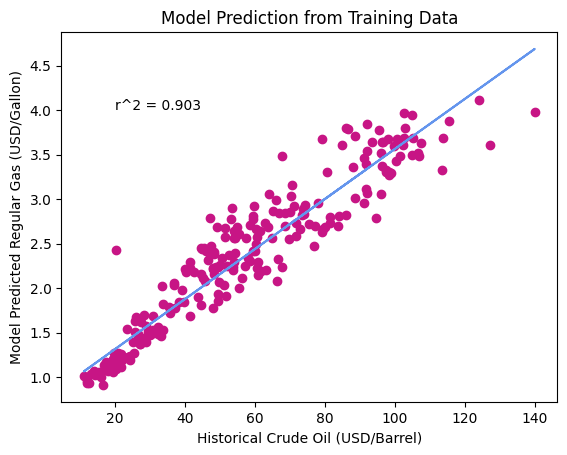

In [113]:
# Training Data Vis
plt.scatter(X_train, Y_train, color = "mediumvioletred")
plt.plot(X_train, lin_reg_model.predict(X_train), color = "cornflowerblue")
plt.title("Model Prediction from Training Data")
plt.xlabel("Historical Crude Oil (USD/Barrel)")
plt.ylabel("Model Predicted Regular Gas (USD/Gallon)")
plt.text(20, 4.0, f"r^2 = {r_2_train:.3f}")
plt.savefig("training_fig.png")


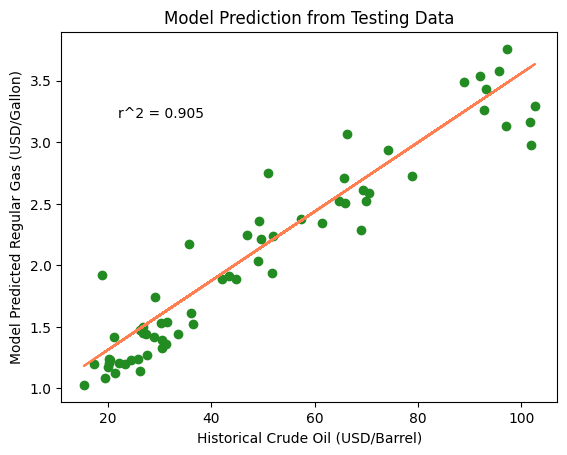

In [114]:
# Test Data Vis
plt.scatter(X_test, Y_test, color = "forestgreen")
plt.plot(X_test, lin_reg_model.predict(X_test), color = "coral")
plt.title("Model Prediction from Testing Data")
plt.xlabel("Historical Crude Oil (USD/Barrel)")
plt.ylabel("Model Predicted Regular Gas (USD/Gallon)")
plt.text(22, 3.2, f"r^2 = {r_2_test:.3f}")
plt.savefig("testing_fig.png")